# **Set up the environment and load the necessary libraries for the project.**

In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


# **Data Loading and Preprocessing**

In [1]:

# Load dataset
data = pd.read_csv("TelcoChurn.csv")
data.head()

NameError: name 'pd' is not defined

In [ ]:


# Drop irrelevant column
data.drop('customerID', axis=1, inplace=True)

# Handle missing values in TotalCharges column
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.dropna(subset=['TotalCharges'], inplace=True)

# Encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Prepare data for analysis
X = data_encoded.drop('Churn_Yes', axis=1)  # Features
y = data_encoded['Churn_Yes']  # Target variable

# Display the processed data
print("Processed Data:")
print(X.head())
print("Target Variable:")
print(y.head())


Processed Data:
   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
0              0       1           29.85         29.85        False   
1              0      34           56.95       1889.50         True   
2              0       2           53.85        108.15         True   
3              0      45           42.30       1840.75         True   
4              0       2           70.70        151.65        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True           False             False   
1        False           False              True   
2        False           False              True   
3        False           False             False   
4        False           False              True   

   MultipleLines_No phone service  MultipleLines_Yes  ...  \
0                            True              False  ...   
1                           False              False  ...   
2                           False              False  ...   


# **EDA**

<ipython-input-8-8159e3da5887>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['Churn'], ax=axes[0, 0], palette=palette)
<ipython-input-8-8159e3da5887>:13: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data['Churn'], ax=axes[0, 0], palette=palette)
<ipython-input-8-8159e3da5887>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=data, ax=axes[1, 0], palette=palette)
<ipython-input-8-8159e3da5887>:25: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.boxplot(x='Churn', y='tenure', data=data, ax=axes[1, 0], palette=palette)
<ipython-input-8-8

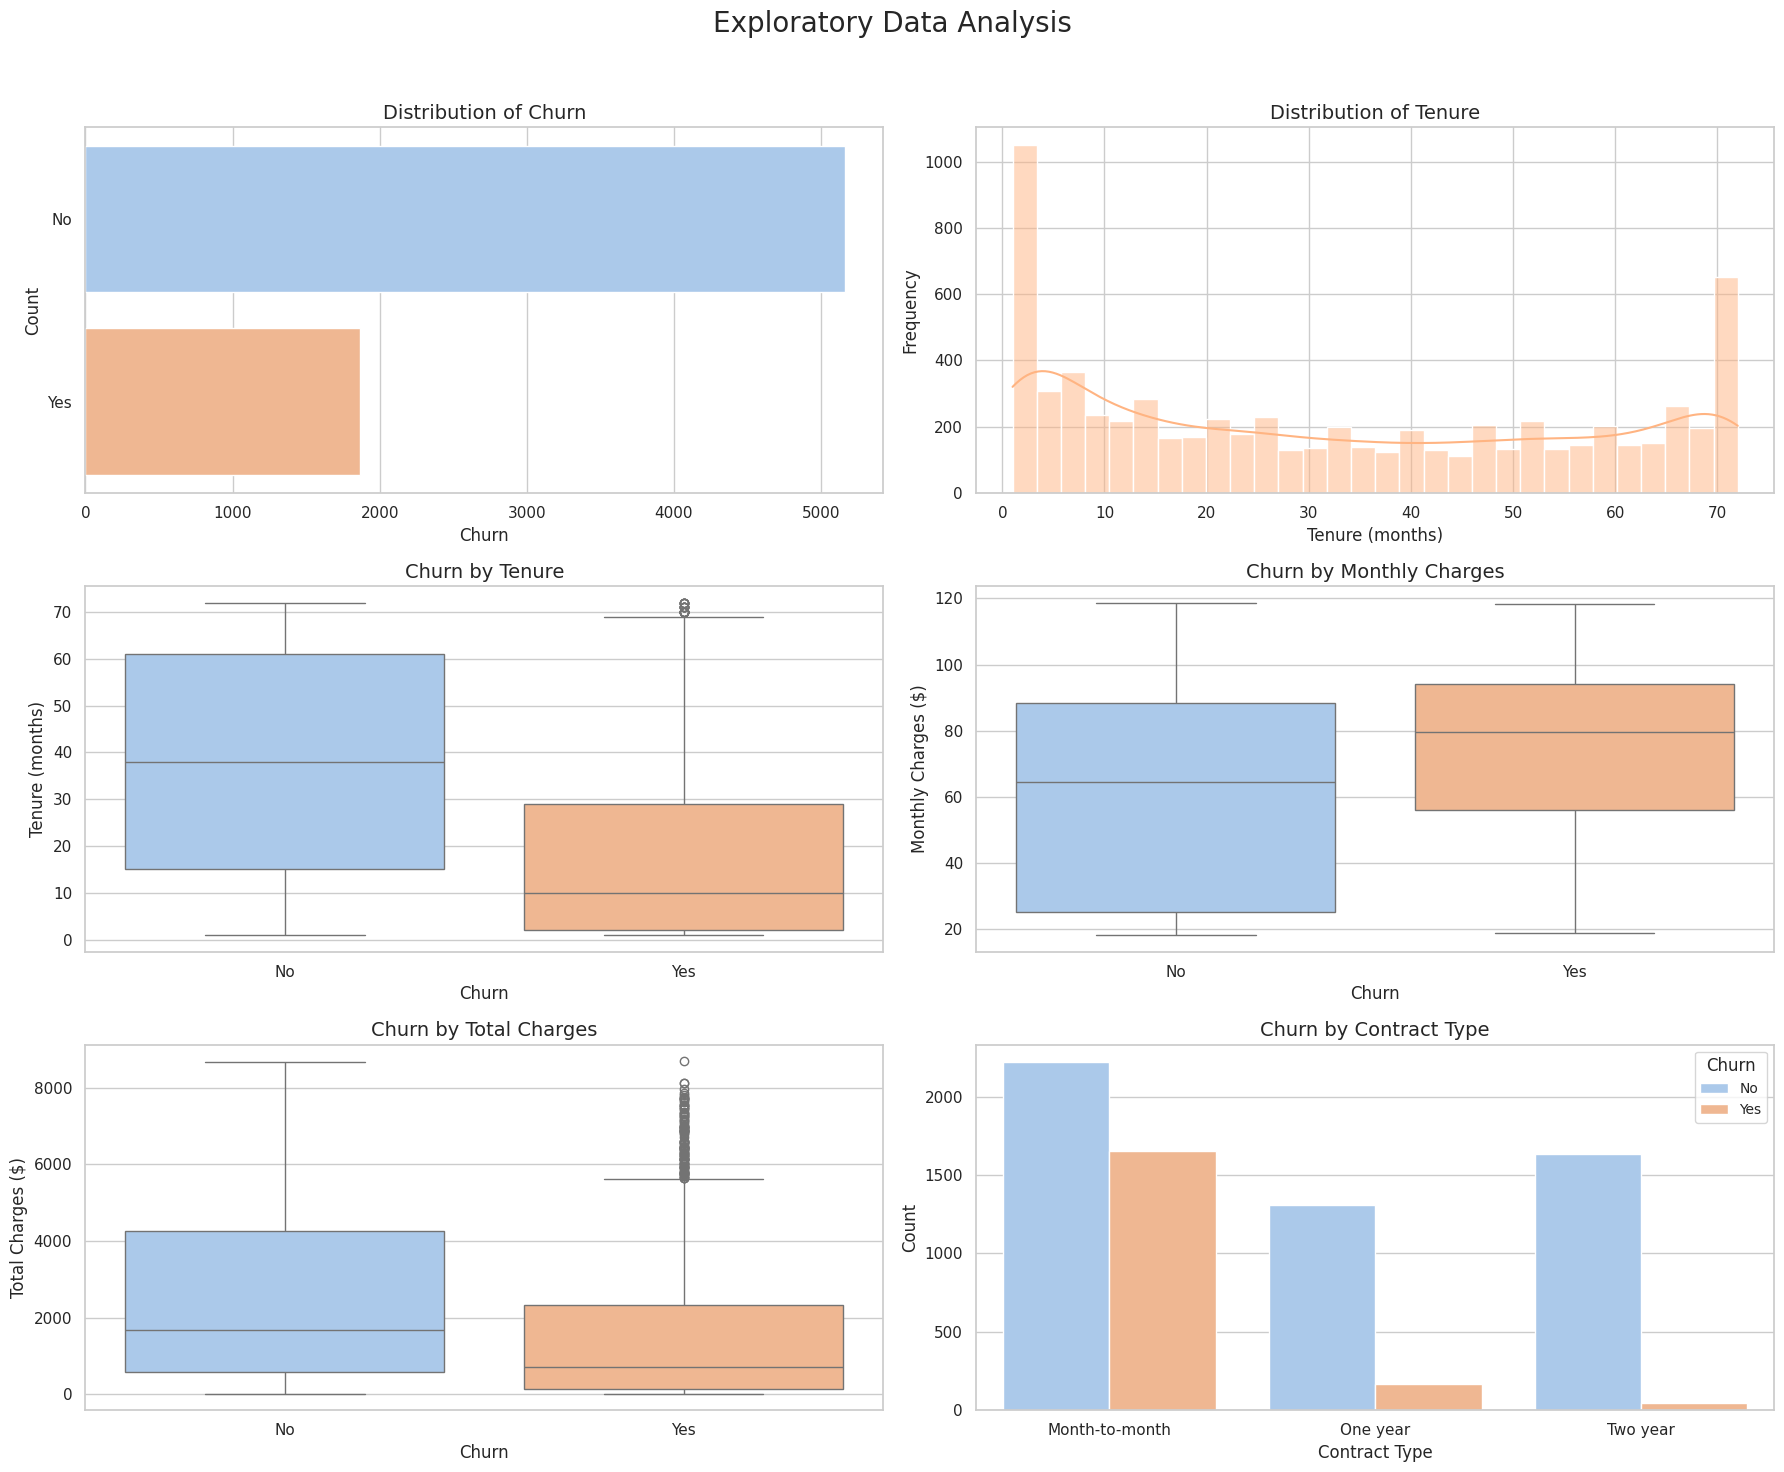

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style and color palette
sns.set(style="whitegrid")
palette = sns.color_palette("pastel")

# Plot settings
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 15))
fig.suptitle('Exploratory Data Analysis', fontsize=20)

# Churn Distribution
sns.countplot(data['Churn'], ax=axes[0, 0], palette=palette)
axes[0, 0].set_title('Distribution of Churn', fontsize=14)
axes[0, 0].set_xlabel('Churn', fontsize=12)
axes[0, 0].set_ylabel('Count', fontsize=12)

# Tenure Distribution
sns.histplot(data['tenure'], bins=30, kde=True, ax=axes[0, 1], color=palette[1])
axes[0, 1].set_title('Distribution of Tenure', fontsize=14)
axes[0, 1].set_xlabel('Tenure (months)', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)

# Churn by Tenure
sns.boxplot(x='Churn', y='tenure', data=data, ax=axes[1, 0], palette=palette)
axes[1, 0].set_title('Churn by Tenure', fontsize=14)
axes[1, 0].set_xlabel('Churn', fontsize=12)
axes[1, 0].set_ylabel('Tenure (months)', fontsize=12)

# Churn by Monthly Charges
sns.boxplot(x='Churn', y='MonthlyCharges', data=data, ax=axes[1, 1], palette=palette)
axes[1, 1].set_title('Churn by Monthly Charges', fontsize=14)
axes[1, 1].set_xlabel('Churn', fontsize=12)
axes[1, 1].set_ylabel('Monthly Charges ($)', fontsize=12)

# Churn by Total Charges
sns.boxplot(x='Churn', y='TotalCharges', data=data, ax=axes[2, 0], palette=palette)
axes[2, 0].set_title('Churn by Total Charges', fontsize=14)
axes[2, 0].set_xlabel('Churn', fontsize=12)
axes[2, 0].set_ylabel('Total Charges ($)', fontsize=12)

# Churn by Contract Type
sns.countplot(x='Contract', hue='Churn', data=data, ax=axes[2, 1], palette=palette)
axes[2, 1].set_title('Churn by Contract Type', fontsize=14)
axes[2, 1].set_xlabel('Contract Type', fontsize=12)
axes[2, 1].set_ylabel('Count', fontsize=12)
axes[2, 1].legend(title='Churn', loc='upper right', fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# **Feature Engineering**

In [ ]:
# Check the column names
print(data.columns)

# Drop 'customerID' column if it exists
if 'customerID' in data.columns:
    data.drop('customerID', axis=1, inplace=True)

# Handle missing values in TotalCharges column
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.dropna(subset=['TotalCharges'], inplace=True)

# Feature 1: Average Monthly Charges
data['AvgMonthlyCharges'] = data['TotalCharges'] / data['tenure']

# Feature 2: Tenure Groups
def tenure_group(tenure):
    if tenure <= 12:
        return '0-12'
    elif tenure <= 24:
        return '13-24'
    elif tenure <= 36:
        return '25-36'
    elif tenure <= 48:
        return '37-48'
    elif tenure <= 60:
        return '49-60'
    else:
        return '61+'

data['tenure_group'] = data['tenure'].apply(tenure_group)

# Feature 3: Has Multiple Services
data['MultipleServices'] = (
    (data['PhoneService'] == 'Yes').astype(int) +
    (data['InternetService'] != 'No').astype(int)
)
data['HasMultipleServices'] = (data['MultipleServices'] > 1).astype(int)
data.drop('MultipleServices', axis=1, inplace=True)

# Encode categorical variables
categorical_cols = data.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Prepare data for analysis
X = data_encoded.drop('Churn_Yes', axis=1)  # Features
y = data_encoded['Churn_Yes']  # Target variable

# Display the new features
print("New Features and Encoded Data:")
print(X.head())


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
New Features and Encoded Data:
   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  AvgMonthlyCharges  \
0              0       1           29.85         29.85          29.850000   
1              0      34           56.95       1889.50          55.573529   
2              0       2           53.85        108.15          54.075000   
3              0      45           42.30       1840.75          40.905556   
4              0       2           70.70        151.65          75.825000   

   HasMultipleServices  gender_Male  Partner_Yes  Dependents_Yes  \
0                    0        False         True           False   
1  

# **Building the Churn Prediction Model**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set size: {X_train.shape[0]}')
print(f'Testing set size: {X_test.shape[0]}')


Training set size: 5625
Testing set size: 1407


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Initialize the models
log_reg = LogisticRegression(max_iter=1000)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the models
log_reg.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to evaluate the models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1, y_pred

# Evaluate Logistic Regression
log_reg_metrics = evaluate_model(log_reg, X_test, y_test)
print(f'Logistic Regression - Accuracy: {log_reg_metrics[0]:.2f}, Precision: {log_reg_metrics[1]:.2f}, Recall: {log_reg_metrics[2]:.2f}, F1-Score: {log_reg_metrics[3]:.2f}')

# Evaluate Random Forest
rf_metrics = evaluate_model(random_forest, X_test, y_test)
print(f'Random Forest - Accuracy: {rf_metrics[0]:.2f}, Precision: {rf_metrics[1]:.2f}, Recall: {rf_metrics[2]:.2f}, F1-Score: {rf_metrics[3]:.2f}')

# Evaluate Gradient Boosting
gb_metrics = evaluate_model(gradient_boosting, X_test, y_test)
print(f'Gradient Boosting - Accuracy: {gb_metrics[0]:.2f}, Precision: {gb_metrics[1]:.2f}, Recall: {gb_metrics[2]:.2f}, F1-Score: {gb_metrics[3]:.2f}')


Logistic Regression - Accuracy: 0.78, Precision: 0.63, Recall: 0.47, F1-Score: 0.53
Random Forest - Accuracy: 0.79, Precision: 0.65, Recall: 0.47, F1-Score: 0.54
Gradient Boosting - Accuracy: 0.80, Precision: 0.65, Recall: 0.50, F1-Score: 0.57


#Confusion matrixes

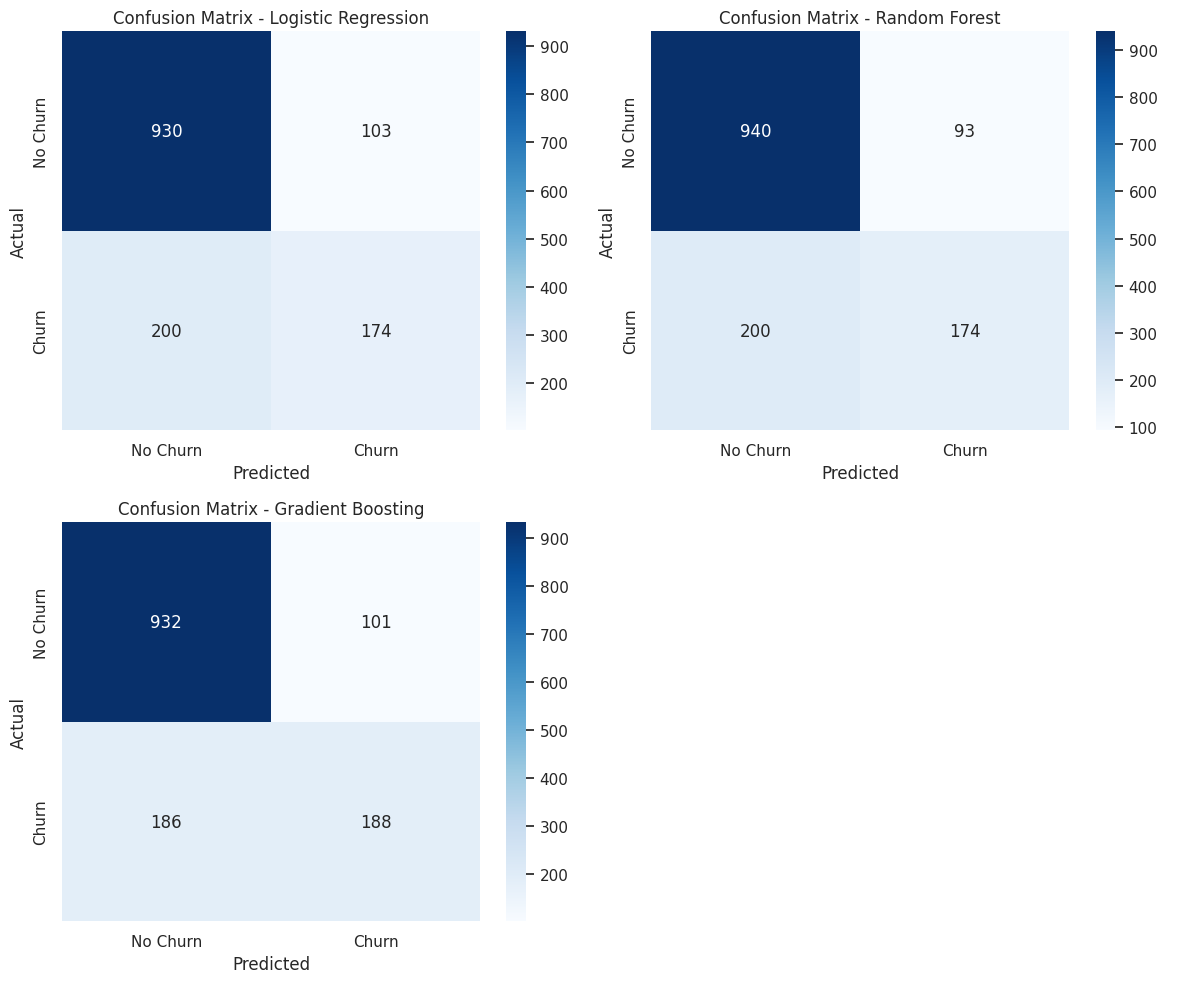

In [ ]:
# Define a function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, title, ax):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'], ax=ax)
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')
    ax.set_title(f'Confusion Matrix - {title}')

# Plot confusion matrices
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

plot_confusion_matrix(y_test, log_reg_metrics[4], "Logistic Regression", axs[0, 0])
plot_confusion_matrix(y_test, rf_metrics[4], "Random Forest", axs[0, 1])
plot_confusion_matrix(y_test, gb_metrics[4], "Gradient Boosting", axs[1, 0])

# Hide the empty subplot in the last position
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()


#ROC of different models

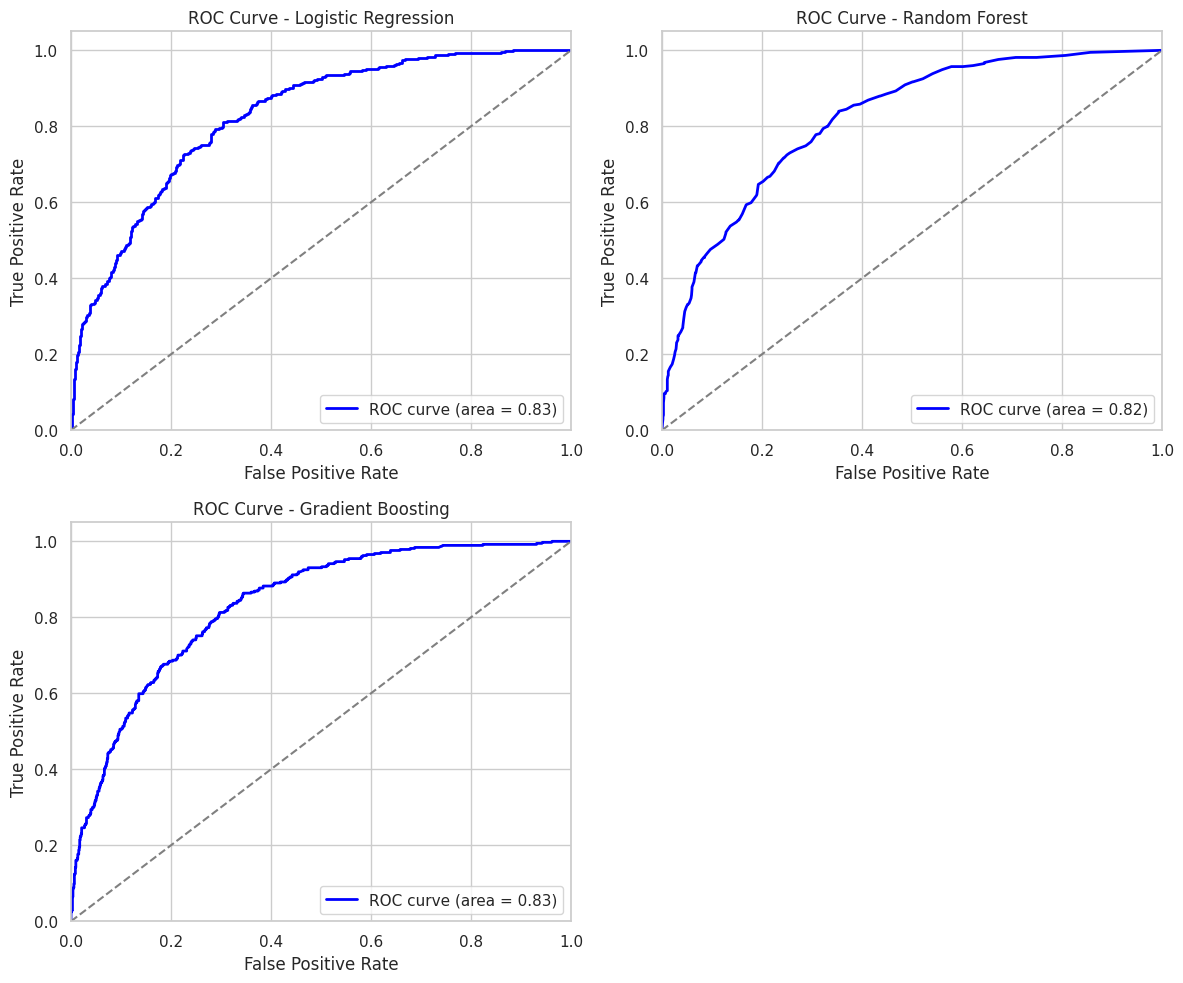

In [ ]:
# Define a function to plot ROC curve
def plot_roc_curve(model, X_test, y_test, title, ax):
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    ax.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], color='gray', linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve - {title}')
    ax.legend(loc="lower right")

# Plot ROC curves
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

plot_roc_curve(log_reg, X_test, y_test, "Logistic Regression", axs[0, 0])
plot_roc_curve(random_forest, X_test, y_test, "Random Forest", axs[0, 1])
plot_roc_curve(gradient_boosting, X_test, y_test, "Gradient Boosting", axs[1, 0])

# Hide the empty subplot in the last position
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Collect metrics for each model
models_metrics = {
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [log_reg_metrics[0], rf_metrics[0], gb_metrics[0]],
    'Precision': [log_reg_metrics[1], rf_metrics[1], gb_metrics[1]],
    'Recall': [log_reg_metrics[2], rf_metrics[2], gb_metrics[2]],
    'F1-Score': [log_reg_metrics[3], rf_metrics[3], gb_metrics[3]]
}

# Convert to DataFrame
metrics_df = pd.DataFrame(models_metrics)

print(metrics_df)


                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.784648   0.628159  0.465241  0.534562
1        Random Forest  0.791756   0.651685  0.465241  0.542902
2    Gradient Boosting  0.796020   0.650519  0.502674  0.567119


# **Resulting Graphs**

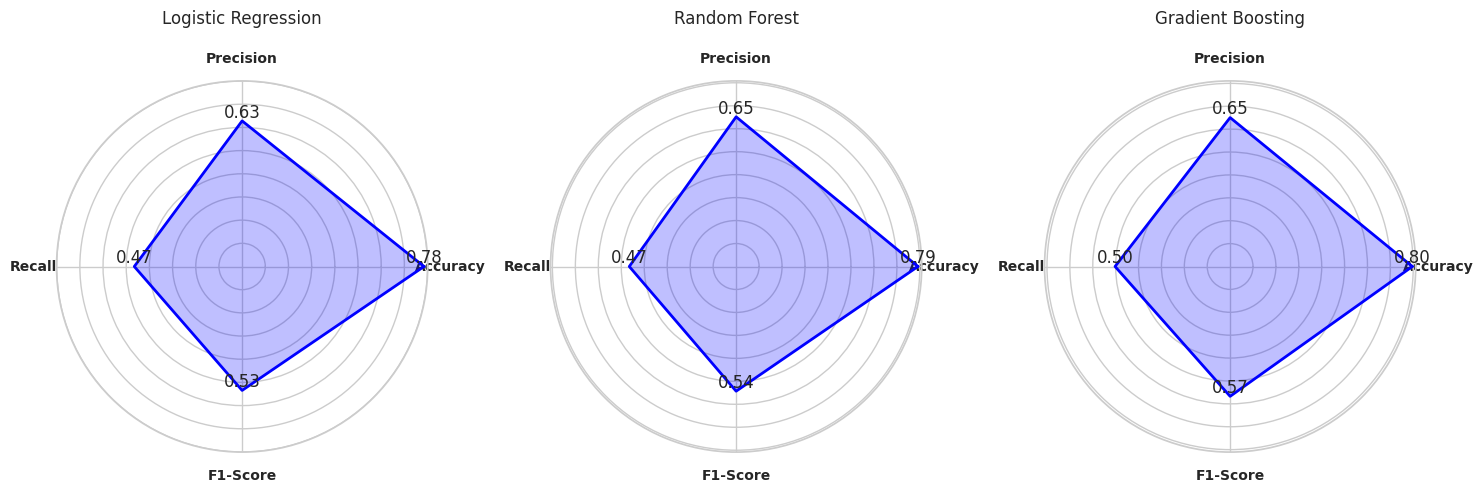

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to create radar chart with values displayed
def radar_chart(ax, categories, values, title):
    # Number of variables
    num_vars = len(categories)

    # Compute angle for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # The plot is circular, so we need to "complete the loop" and append the start
    values += values[:1]
    angles += angles[:1]

    # Plot data
    ax.plot(angles, values, color='blue', linewidth=2, linestyle='solid')
    ax.fill(angles, values, color='blue', alpha=0.25)

    # Display values at end points
    for angle, value, category in zip(angles[:-1], values[:-1], categories):
        ax.text(angle, value, f'{value:.2f}', ha='center', va='bottom')

    # Set the labels
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=10, fontweight='bold', rotation=45)

    # Add a title
    ax.set_title(title, pad=20, fontsize=12)

# Define categories and values for each model
categories = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

values_log_reg = [log_reg_metrics[0], log_reg_metrics[1], log_reg_metrics[2], log_reg_metrics[3]]
values_rf = [rf_metrics[0], rf_metrics[1], rf_metrics[2], rf_metrics[3]]
values_gb = [gb_metrics[0], gb_metrics[1], gb_metrics[2], gb_metrics[3]]

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5), subplot_kw=dict(polar=True))

# Plot radar charts for each model
radar_chart(axs[0], categories, values_log_reg, 'Logistic Regression')
radar_chart(axs[1], categories, values_rf, 'Random Forest')
radar_chart(axs[2], categories, values_gb, 'Gradient Boosting')

plt.tight_layout()
plt.show()


#**Thank you**

This project predicts customer churn in a telecommunications company using machine learning.
It involves data loading, preprocessing, EDA, feature engineering, model building, and evaluation.
Key steps include environment setup, data preprocessing, EDA, feature engineering, model training, and evaluation.
Results are visualized using various plots, including confusion matrices, ROC curves, and radar charts.